In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Load Data

In [3]:
import os

print(os.getcwd())

/Users/davidleonardi/Projects/KE5206_CA_1/OnlineNewsPopularity


In [4]:
df = pd.read_csv('Data/OnlineNewsPopularity.csv', sep='\s*,\s*', header=0, encoding='ascii', engine='python')

df.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


# Data Exploration

In [12]:
import numpy as np
count, division = np.histogram(df['shares'], bins=20)

row_count = len(df.index)

bins = []
percentage = []
for x in range(1, len(division)):
    bins.append("{} - {}".format(round(division[x-1], 2), round(division[x], 2)))
    percentage.append("{}%".format(round(count[x-1] / row_count * 100, 2)))

histogram_df = pd.DataFrame({'bins': bins, 'freq': count, 'percentage': percentage})
histogram_df.head(20)

,bins,freq,percentage
0,1.0 - 42165.95,39377,99.33%
1,42165.95 - 84330.9,186,0.47%
2,84330.9 - 126495.85,46,0.12%
3,126495.85 - 168660.8,14,0.04%
4,168660.8 - 210825.75,8,0.02%
5,210825.75 - 252990.7,3,0.01%
6,252990.7 - 295155.65,1,0.0%
7,295155.65 - 337320.6,3,0.01%
8,337320.6 - 379485.55,0,0.0%
9,379485.55 - 421650.5,0,0.0%


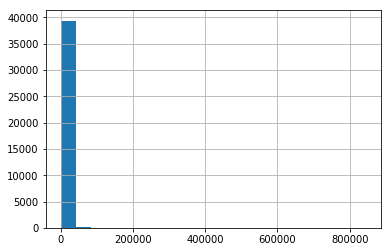

In [13]:
df['shares'].hist(bins=division)

### Remove url and timedelta

In [7]:
df = df.drop(['url', 'timedelta'], axis=1)

df.head(5)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [8]:
# Compute the correlation matrix
corr = df.corr()

corr.head(10)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,0.222588,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,0.126879,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,0.033924,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,-0.002940,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936
average_token_length,-0.071403,0.167789,0.026407,0.031554,0.034185,0.222588,0.126879,0.033924,-0.002940,1.000000,...,0.222207,0.471383,-0.324529,-0.278784,-0.194660,-0.040406,-0.016718,0.026586,-0.036953,-0.022007


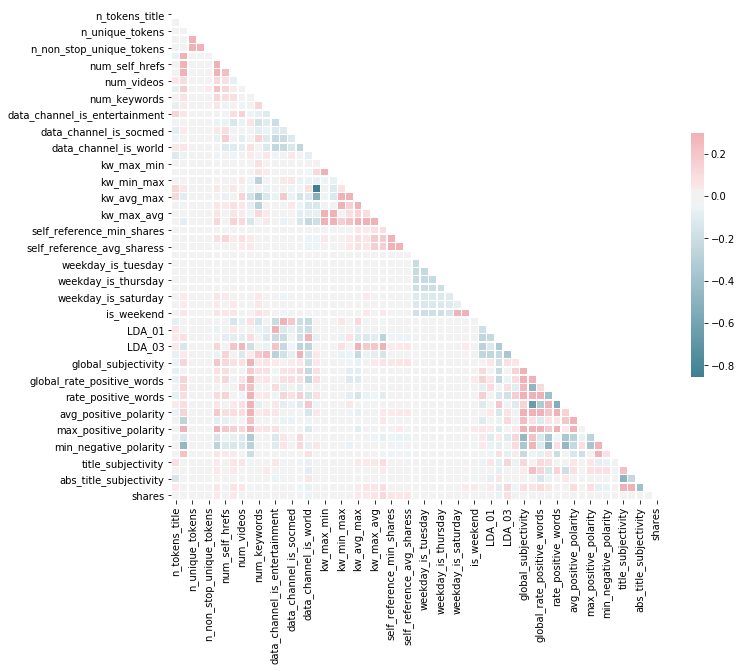

In [9]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
def remove_correlation(input_dataset, threshold):
    dataset = input_dataset.copy(deep=True)
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                colname_j = corr_matrix.columns[j] # getting the name of the other column
                col_corr.add(colname)
                if colname in dataset.columns:
                    print("Remove '{}' due to it's similarity to '{}'".format(colname, colname_j))
                    del dataset[colname] # deleting the column from the dataset

    return dataset, col_corr

Remove 'n_non_stop_words' due to it's similarity to 'n_unique_tokens'
Remove 'n_non_stop_unique_tokens' due to it's similarity to 'n_unique_tokens'
Remove 'kw_avg_min' due to it's similarity to 'kw_max_min'
Remove 'kw_max_max' due to it's similarity to 'kw_min_min'
Remove 'self_reference_avg_sharess' due to it's similarity to 'self_reference_max_shares'


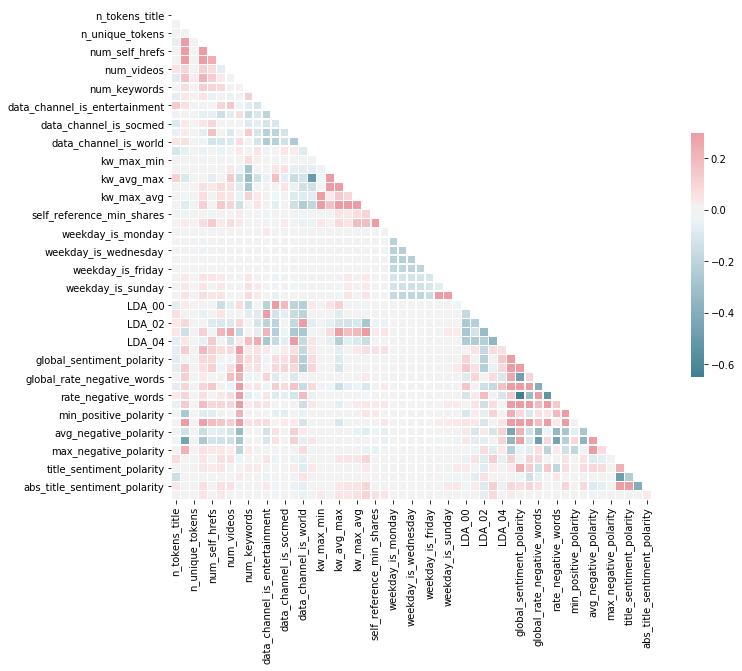

In [11]:
# threshold value
correlation_threshold = 0.85

new_df, removed_columns = remove_correlation(df, correlation_threshold)

# Compute the correlation matrix
new_corr = new_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(new_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(new_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## General Regression Neural Network

### Test Neupy GRNN for sample dataset

In [11]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from neupy import algorithms, estimators, environment

environment.reproducible()

dataset = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(
    preprocessing.minmax_scale(dataset.data),
    preprocessing.minmax_scale(dataset.target.reshape((-1, 1))),
    test_size=0.3,
)

grnn_model = algorithms.GRNN(std=0.1, verbose=False)
grnn_model.train(x_train, y_train)

y_predicted = grnn_model.predict(x_test)
estimators.rmse(y_predicted, y_test)

0.2381013391408185

### Test Neupy on our dataset

In [12]:
def dataframe_split(dataframe, target_column, as_matrix=True):
    target = dataframe[target_column]
    features = dataframe.loc[:, dataframe.columns != target_column]
    if as_matrix:
        target = target.as_matrix()
        features = features.as_matrix()
    return features, target

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from neupy import algorithms, estimators, environment

environment.reproducible()

features, target = dataframe_split(new_df, 'shares')

x_train, x_test, y_train, y_test = train_test_split(
    preprocessing.minmax_scale(features),
    preprocessing.minmax_scale(target.reshape((-1, 1))),
    test_size=0.3,
)

grnn_model = algorithms.GRNN(std=0.1, verbose=True)
grnn_model.train(x_train, y_train)

y_predicted = grnn_model.predict(x_test)
estimators.rmse(y_predicted, y_test)

/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)



Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.1



0.017084571031911498

### Grid search for std parameters

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from neupy import algorithms, estimators, environment
import pickle

environment.reproducible()

params = np.linspace(0.1, 0.9, 9)

best_rmse = 1
best_std = 0

for std in params:
    grnn = algorithms.GRNN(std=std, verbose=True)
    grnn.train(x_train, y_train)
    
    y_predicted = grnn.predict(x_test)
    rmse = estimators.rmse(y_predicted, y_test)
    print("RMSE {} for std {}".format(rmse, std))
    if rmse < best_rmse:
        best_rmse = rmse
        best_std = std
        
        with open('grnn.pickle', 'wb') as f:
            pickle.dump(grnn, f)


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.1

RMSE 0.016979933652799466 for std 0.1

Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.2

RMSE 0.015979094998116 for std 0.2

Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.30000000000000004

RMSE 0.013804528077384734 for std 0.30000000000000004

Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal 